
IEEE - ITBA

Curso: Introducción a Python 2020.

Bienvenido a Electrocardiograma.py

El Programa analizará el siguiente Electrocardiograma:

      señal    tiempo
0     0.000  0.000000
1     0.000  0.002778
2     0.000  0.005556
3     0.000  0.008333
4     0.000  0.011111
...     ...       ...
1995  0.005  5.541667
1996 -0.015  5.544444
1997 -0.030  5.547222
1998 -0.055  5.550000
1999 -0.070  5.552778

[2000 rows x 2 columns]

Ahora empecemos cargando los datos del Paciente: 



Ingrese Nombre[Opcional]:  Laura Del valle


Nombre cargado correctamente



Ingrese Apellido[Opcional]:  diaz


Apellido cargado correctamente



Ingrese si es Masculino o Femenino:  f


Sexo ingresado correctamente



Ingrese Edad en años:  28


Edad ingresada correctamente



Ingrese Peso en kilos:  68


Peso ingresado correctamente

Listo, los datos ya están cargados, ahora se graficará el Electrocardiograma dado:



¿Desea guardar el gráfico antes de mostrarlo? si/no:  s


Escriba el nombre con el que desea guardarlo  electro_laura


Imagen guardada correctamente



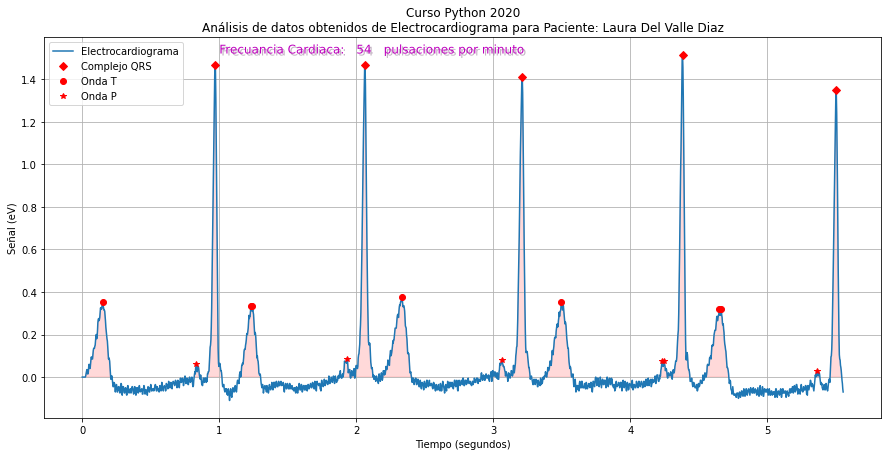


A continuación, se mostrará el Análisis del Electrocardiograma:



¿Desea guardar los resultados obtenidos antes de mostrarlo? si/no:  s


Escriba el nombre con el que desea guardarlo electro_laura




Resulados del Electrocardiograma:

Nombre del Paciente: Laura Del Valle
Apellido del Paciente: Diaz
Sexo: Femenino
Edad: 28 años
Peso: 68 kilos

Frecuancia Cardiaca del Paciente: 54 pulsaciones por minuto,
el Electrocardiograma fue tomado mientras el paciente dormía.
Frecuencia Cardiaca Máxima: 195 pulsaciones por minuto.

Desarrollado por: Electrocardiograma.py

¡Muchas Gracias por utilizar Nuestros Servicios!
¡Que tenga un Buen Día!.


Proyecto Realizado por Alumno: 
Escalada Christian.


In [6]:
# Alumno: Escalada Christian

# Se importan las librerias a usar
import os
import copy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib import patheffects

print("\nIEEE - ITBA")

print("\nCurso: Introducción a Python 2020.")

print("\nBienvenido a Electrocardiograma.py\n"
      "\nEl Programa analizará el siguiente Electrocardiograma:\n")

# Se cargan los datos
try:
    url = "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx"
    df = pd.read_excel(url, usecols=["señal", "tiempo"])

except:
    df = pd.read_excel("electrocardiograma.xlsx", usecols=["señal", "tiempo"])

print(df)

print("\nAhora empecemos cargando los datos del Paciente: ")

# Se guarda un set con datos de caracteres indeseados
# válido para nombre y apellido
indeseados = {
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "", "#", "$", "%", "&",
    "*", "[", "]", "{", "}", "_", ":", ";", "-", ",", "/", "(", ")", "=", "''", '\\',
    "?", "¿", "!", "¡", "|", "°", "+", "'", ".", '"', "´", "´´", "¨", "^", "~", "<", ">",
}

# Se guarda un set con datos de caracteres indeseados
# válido para gráfico y texto
indeseados2 = {
    "", "#", "$", "%", "&", " ", "=", "''", '\\', "~", "<", ">",
    "*", "[", "]", "{", "}", ":", ";", "-", ",", "/", "(", ")", "^",
    "?", "¿", "!", "¡", "|", "°", "+", "'", ".", '"', "´", "´´", "¨",
}


# Se arma función Nombre [Opcional]
# es opcional porque toma como válido presionar enter sin ingresar nada
def funcion_nombre():
    nombre = ((input("Ingrese Nombre[Opcional]: ")).lower()).strip()
    error = 0
    for i in range(len(nombre)):
        if nombre[i] in indeseados:  # Acepta white space
            error = error + 1  # cuenta la cantidad de indeseados para indicar error

    if error >= 1:
        print("ERROR, vuelva a cargar nombre")
        return funcion_nombre()
    else:
        print("Nombre cargado correctamente")
        return nombre


# Se arma función Apellido [Opcional]
# es opcional porque toma como valido presionar enter sin ingresar nada
def funcion_apellido():
    apellido = ((input("Ingrese Apellido[Opcional]: ")).lower()).strip()
    error = 0
    for i in range(len(apellido)):
        if apellido[i] in indeseados:
            error = error + 1  # cuenta la cantidad de indeseados

    if error >= 1:
        print("ERROR, vuelva a cargar Apellido")
        return funcion_apellido()
    else:
        print("Apellido cargado correctamente")
        return apellido


# Se llama a la función y se guarda las variables
print()
Nombre = copy.copy(funcion_nombre())
print()
Apellido = copy.copy(funcion_apellido())


# Se arma función sexo
def funcion_sexo():
    sexo = ((input("Ingrese si es Masculino o Femenino: ")).lower()).strip()

    if type(sexo) is str:
        if (sexo == "masculino") or (sexo == "femenino"):
            print("Sexo ingresado correctamente")
            return sexo
        elif sexo == "m":
            print("Sexo ingresado correctamente")
            sexo = "masculino"
            return sexo
        elif sexo == "f":
            print("Sexo ingresado correctamente")
            sexo = "femenino"
            return sexo

        else:
            print("ERROR, ingrese sexo correctamente")  # este se ejecuta cuando es str pero escribe mal los datos
            return funcion_sexo()
    else:
        print("ERROR, ingrese sexo nuevamente")  # este se ejecuta cuando no es str
        return funcion_sexo()


# Se arma función edad
def funcion_edad():
    edad = (input("Ingrese Edad en años: ")).strip()

    if edad.isdigit() is True:
        if (int(edad) >= 20) & (int(edad) <= 65):  # fuente: http://www.frecuencia-cardiaca.com/tabladepulsaciones.php
            print("Edad ingresada correctamente")
            return edad
        else:
            print("ERROR, vuelva a ingresar Edad correctamente")
            print("La FCM se calcula para personas entre 20 años y 65 años")
            return funcion_edad()

    else:
        print("ERROR, vuelva a ingresar Edad correctamente")  # Se ejecuta cuando no es número el ingreso
        return funcion_edad()


# Se arma función peso
def funcion_peso():
    peso = (input("Ingrese Peso en kilos: ")).strip()

    if peso.isdigit() is True:
        if (int(peso) >= 45) & (int(peso) <= 100):  # fuente: https://peso-altura.com/peso-ideal-segun-altura-y-edad
            print("Peso ingresado correctamente")
            return peso
        else:
            print("ERROR, vuelva a ingresar Peso correctamente")
            print("El Peso permitido para el calculo de FCM es entre 45 kilos y 100 kilos")
            return funcion_peso()

    else:
        print("ERROR, vuelva a ingresar Peso correctamente")
        return funcion_peso()


# Se cargan y guardan los valores para mas adelante
print()
Sexo = copy.copy(funcion_sexo())
print()
Edad = copy.copy(funcion_edad())
print()
Peso = copy.copy(funcion_peso())
print()

# Ecuación de FCM - #fuente:https://es.wikipedia.org/wiki/Frecuencia_card%C3%ADaca
if Sexo == "masculino":
    Frec_Card_Max = ((210 - (0.5 * float(Edad))) - (0.01 * float(Peso)) + 4)
else:
    Frec_Card_Max = (210 - (0.5 * float(Edad))) - (0.01 * float(Peso))


# Se calculan los picos máximos
y = df["señal"]
x = df["tiempo"]
h = (df["señal"].max()) * 0.7  # con este código automatizamos el height
peaks, _ = find_peaks(y, height=h)  # Calculo el Complejo QRS
peaksT, _ = find_peaks(y, prominence=0.01, width=20, height=0.3)  # Busco onda T
peaksP, properties = find_peaks(y, prominence=(None, 0.2), width=10, height=0.01)  # Busco onda P

# Se calcula la frecuencia cardiaca por minuto, conociendo el ritmo cardiaco por segundo en el excel dado
frecuenciaXminuto = 60 / (x[peaks].max() / len(x[peaks]))  # regla de 3 simple

# Se grafica el electrocardiograma
plt.figure(figsize=(15, 7))
plt.plot(x, y, label="Electrocardiograma")
plt.fill_between(x, 0, y, where=(y > 0), color="r", alpha=0.15)

# Se grafican los picos máximos
plt.plot(x[peaks], y[peaks], "rD", label="Complejo QRS")
plt.plot(x[peaksT], y[peaksT], "ro", label="Onda T")
plt.plot(x[peaksP], y[peaksP], "r*", label="Onda P")

# Se escribe el valor de la frecuencia cardiaca dentro del gráfico
plt.text(1, 1.52, s="Frecuancia Cardiaca:", fontfamily={'sans-serif'},
         fontsize=12, path_effects=[patheffects.withSimplePatchShadow()], color='m')
plt.text(2.0, 1.52, s=(int(frecuenciaXminuto)), fontfamily={'sans-serif'},
         fontsize=12, path_effects=[patheffects.withSimplePatchShadow()], color='m')
plt.text(2.2, 1.52, s="pulsaciones por minuto", fontfamily={'sans-serif'},
         fontsize=12, path_effects=[patheffects.withSimplePatchShadow()], color='m')

# Se da formato al gráfico
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Señal (eV)")
plt.title(f"Curso Python 2020\nAnálisis de datos obtenidos de Electrocardiograma para Paciente: {Nombre.title()} {Apellido.capitalize()}")
plt.legend(loc="upper left")
plt.grid()


# Se determina la condición en la que se le tomó al paciente la frecuancia cardiaca
if (frecuenciaXminuto >= 100) & (
        frecuenciaXminuto <= 200):  # fuente: https://es.wikipedia.org/wiki/Frecuencia_card%C3%ADaca
    text = "el Electrocardiograma fue tomado mientras el paciente hacia actividad física."

elif (frecuenciaXminuto >= 60) & (
        frecuenciaXminuto < 100):  # fuente: https://es.wikipedia.org/wiki/Frecuencia_card%C3%ADaca
    text = "el Electrocardiograma fue tomado mientras el paciente estaba en reposo."

elif (frecuenciaXminuto >= 40) & (
        frecuenciaXminuto < 60):  # fuente obtenida de: https://curiosoando.com/ritmo-cardiaco-durante-el-sueno
    text = "el Electrocardiograma fue tomado mientras el paciente dormía."

else:  # este en caso de que los valores superen los maximos y minimos normales
    text = "¡valores fuera de rango! cosulte a su médico especialista, " \
           "usted deberia tener una frecuencia cardiaca de entre: 40 a 200 ppm."

print("Listo, los datos ya están cargados, ahora se graficará el Electrocardiograma dado:")


# Se guarda y se muestra el gráfico terminado
def funcion_si_no():
    si_no = (str(input("¿Desea guardar el gráfico antes de mostrarlo? si/no: ")).lower()).strip()
    if si_no == "si" or si_no == "s":
        funcion_grafico()
    elif si_no == "no" or si_no == "n":
        plt.show()
    else:
        print("ERROR, escriba nuevamente que quiere hacer")
        return funcion_si_no()


def funcion_grafico():
    print()
    grafico = ((str(input("Escriba el nombre con el que desea guardarlo "))).lower()).strip("_ ")
    error = 0
    for i in range(len(grafico)):
        if grafico[i] in indeseados2:  # Acepta guión bajo
            error = error + 1

    if grafico == "":
        print("ERROR, vuelva a cargar nombre nuevamente")
        return funcion_grafico()

    elif error >= 1:
        print("ERROR, vuelva a cargar nombre correctamente ")
        return funcion_grafico()
    else:
        print("Imagen guardada correctamente\n")
        plt.savefig(grafico.capitalize() + '.png')
        return plt.show()


print()
funcion_si_no()
print()

print("A continuación, se mostrará el Análisis del Electrocardiograma:")


# Se guarda y se muestra el Análisis terminado
def funcion_si_no_texto():
    si_no_texto = (str(input("¿Desea guardar los resultados obtenidos antes de mostrarlo? si/no: ")).lower()).strip()
    if si_no_texto == "si" or si_no_texto == "s":
        funcion_texto()
    elif si_no_texto == "no" or si_no_texto == "n":
        print("\nResulados de Electrocardiograma:" + os.linesep)
        print("Nombre del Paciente: ", str(Nombre).capitalize())
        print("Apellido del Paciente: ", str(Apellido).capitalize())
        print("Sexo: ", str(Sexo).capitalize())
        print("Edad: ", str(Edad), " años")
        print("Peso: ", str(Peso), " kilos" + os.linesep)
        print('Frecuancia Cardiaca del Paciente: ', str(int(frecuenciaXminuto)), ' pulsaciones por minuto,')
        print(text)
        print("Frecuencia Cardiaca Máxima: ", str(int(Frec_Card_Max)), " pulsaciones por minuto.")
        print("\nDesarrollado por: Electrocardiograma.py" + os.linesep)
        print("¡Muchas Gracias por utilizar Nuestros Servicios!\n¡Que tenga un Buen Día!.")
    else:
        print("ERROR, escriba nuevamente que quiere hacer")
        return funcion_si_no_texto()


def funcion_texto():
    print()
    texto = (((str(input("Escriba el nombre con el que desea guardarlo"))).lower()).strip("_ "))
    error = 0
    for i in range(len(texto)):
        if texto[i] in indeseados2:  # Acepta guión bajo
            error = error + 1

    if texto == "":
        print("ERROR, vuelva a cargar nombre nuevamente")
        return funcion_texto()

    elif error >= 1:
        print("ERROR, vuelva a cargar nombre correctamente ")
        return funcion_texto()
    else:
        print("\n")
        # Se crea el archivo .txt en el mismo lugar donde se encentra nuestro codigo .py
        file = open(texto.capitalize() + ".txt", "w", encoding="utf-8")
        file.write("Resulados del Electrocardiograma:" + os.linesep)
        file.write("Nombre del Paciente: ")
        file.write((str(Nombre)).title())
        file.write("\nApellido del Paciente: ")
        file.write((str(Apellido)).capitalize())
        file.write("\nSexo: ")
        file.write((str(Sexo)).capitalize())
        file.write("\nEdad: ")
        file.write(str(Edad))
        file.write(" años")
        file.write("\nPeso: ")
        file.write(str(Peso))
        file.write(" kilos" + os.linesep)
        file.write('Frecuancia Cardiaca del Paciente: ')
        file.write(str(int(frecuenciaXminuto)))
        file.write(' pulsaciones por minuto,\n')
        file.write(text)
        file.write("\nFrecuencia Cardiaca Máxima: ")
        file.write(str(int(Frec_Card_Max)))
        file.write(" pulsaciones por minuto." + os.linesep)
        file.write("Desarrollado por: Electrocardiograma.py" + os.linesep)
        file.write("¡Muchas Gracias por utilizar Nuestros Servicios!\n¡Que tenga un Buen Día!.")
        file.close()

        # Se visualiza el archivo .txt
        file = open(texto + ".txt", "r", encoding="utf-8")
        contenido = file.read()
        print(contenido)
        file.close()


print()
funcion_si_no_texto()

print()

print("\nProyecto Realizado por Alumno: \nEscalada Christian.")


